In [22]:
import requests
from bs4 import BeautifulSoup as bs
import re
from wordcloud import WordCloud


In [23]:
# creating empty reviews list 
movie_review = []
# import data from url
url = "https://www.imdb.com/title/tt7286456/reviews?ref_=tt_ql_3"
response = requests.get(url)
soup = bs(response.content,"html.parser")
rev =soup.findAll("div",attrs={"class","content"})

# writng reviews in a text file 
with open("imdb.txt","w",encoding='utf8') as output:
    output.write(str(rev))

In [24]:
for i in range(len(rev)):
    movie_review.append(rev[i].text)
movie_rev_string = " ".join(movie_review)


In [25]:
# Removing unwanted symbols incase if exists
movie_rev_string = re.sub("[^A-Za-z" "]+", " ", movie_rev_string).lower()
movie_rev_string = re.sub("[0-9" "]+", " ", movie_rev_string)


In [26]:
# words that contained in  reviews
movie_review_words = movie_rev_string.split(" ")


In [27]:
with open("C:/Users/manth/Assignment/Text Mining/stop.txt","r") as sw:
    stopwords = sw.read()

stopwords = stopwords.split("\n")

movie_review_words = [w for w in movie_review_words if not w in stopwords]

In [28]:
# Joinining all the reviews into single paragraph 
movie_rev_para = " ".join(movie_review_words)

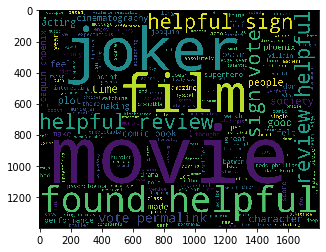

In [29]:
wordcloud_ip = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(movie_rev_para)

plt.imshow(wordcloud_ip)

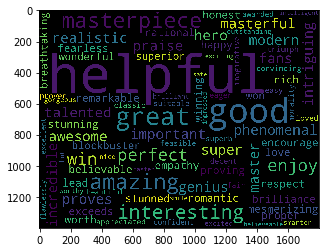

In [30]:
# positive words # Choose the path for +ve words stored in system
with open("C:/Users/manth/Assignment/Text Mining/positive-words.txt","r") as pos:
  poswords = pos.read().split("\n")
  
# Choosing the only words which are present in positive words
movie_pos = " ".join ([w for w in movie_review_words if w in poswords])

# Positive word cloud
wordcloud_pos = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(movie_pos)

plt.imshow(wordcloud_pos)


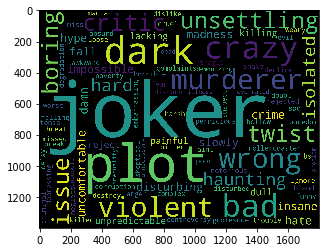

In [31]:
# negative words  Choose path for -ve words stored in system
with open("C:/Users/manth/Assignment/Text Mining/negative-words.txt","r") as neg:
  negwords = neg.read().split("\n")

# Choosing the only words which are present in negwords
movie_neg = " ".join ([w for w in movie_review_words if w in negwords])

# negative word cloud
wordcloud_neg = WordCloud(
                      background_color='black',
                      width=1800,
                      height=1400
                     ).generate(movie_neg)

plt.imshow(wordcloud_neg)